In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from env import get_db_url
import wrangle_zillow as w
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from env import get_db_url
import wrangle_zillow as w
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# creating df variable

In [3]:
df = w.get_zillow_data()

In [4]:
df

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,parcelid.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,14297519,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,17052889,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,14186244,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12095076,781532,NaN,...,12095076,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12412492,2274245,NaN,...,12412492,0.001082,2017-09-19,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
52315,NaN,NaN,261.0,2.0,NaN,NaN,NaN,11000655,673515,NaN,...,11000655,0.020615,2017-09-20,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
52316,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17239384,2968375,NaN,...,17239384,0.013209,2017-09-21,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
52317,NaN,NaN,261.0,2.0,NaN,NaN,1.0,12773139,1843709,NaN,...,12773139,0.037129,2017-09-21,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [5]:
#statistic_table(df)
#calculating median of property values 
median = df.logerror.median() 

#calculating mean of property values 
mean = df.logerror.mean()

# difference between mean and median 
difference = mean - median

#provides data for table
stats = [["Median", median], 
    ["Mean", mean],
    ["Difference", difference]]
        
#define header names
col_names = ["Metric", "Value"]
  
#display table
print(tabulate(stats, headers=col_names))

Metric           Value
----------  ----------
Median      0.00693478
Mean        0.0181355
Difference  0.0112007


In [6]:
stats

[['Median', 0.00693477898541],
 ['Mean', 0.018135509392008628],
 ['Difference', 0.011200730406598629]]

In [7]:
df.info


<bound method DataFrame.info of        typeconstructiontypeid  storytypeid  propertylandusetypeid  \
0                         NaN          NaN                  261.0   
1                         NaN          NaN                  261.0   
2                         NaN          NaN                  261.0   
3                         NaN          NaN                  261.0   
4                         NaN          NaN                  261.0   
...                       ...          ...                    ...   
52314                     NaN          NaN                  261.0   
52315                     NaN          NaN                  261.0   
52316                     NaN          NaN                  261.0   
52317                     NaN          NaN                  261.0   
52318                     NaN          NaN                  261.0   

       heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                        NaN                  NaN           

<AxesSubplot:xlabel='logerror', ylabel='Count'>

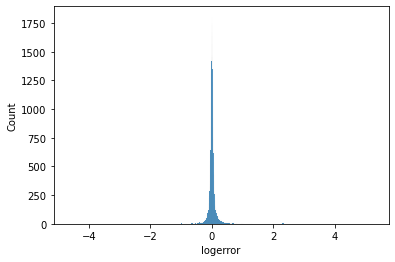

In [8]:
  sns.histplot(data=df, x="logerror")

In [9]:
def bar_chart(data,x,y):
    #Bar chart of Log Error
    plt.title("Fips and Logerror")
    sns.barplot(x="fips", y="logerror", data=train)
    mean_logerror = train.logerror.mean()
    plt.axhline(mean_logerror, label="Logerror", color='red', linestyle='dotted')
    plt.xlabel('')
    plt.legend()
    plt.show()

In [11]:
columns = ['buildingqualitytypeid','heatingorsystemdesc','heatingorsystemtypeid','unitcnt','propertyzoningdesc','propertylandusedesc','parcelid.1','id.1','censustractandblock']

In [12]:
#using handle missing values function
df = w.data_prep(df,columns)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50604 entries, 0 to 52318
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       50604 non-null  float64
 1   parcelid                    50604 non-null  int64  
 2   id                          50604 non-null  int64  
 3   baths                       50604 non-null  float64
 4   beds                        50604 non-null  float64
 5   calculatedbathnbr           50604 non-null  float64
 6   sqft                        50604 non-null  float64
 7   finishedsquarefeet12        50604 non-null  float64
 8   fips                        50604 non-null  float64
 9   fullbathcnt                 50604 non-null  float64
 10  latitude                    50604 non-null  float64
 11  longitude                   50604 non-null  float64
 12  lotsizesquarefeet           50604 non-null  float64
 13  propertycountylandusecode   506

In [14]:
df = w.prepare_zillow(df)

/Users/allantestaten/codeup-data-science/clustering-exercises/clustering-project/wrangle_zillow.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.orange_county[df.location == 1] = 1
/Users/allantestaten/codeup-data-science/clustering-exercises/clustering-project/wrangle_zillow.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ventura[df.location == 2] = 1
/Users/allantestaten/codeup-data-science/clustering-exercises/clustering-project/wrangle_zillow.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50604 entries, 0 to 52318
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       50604 non-null  float64
 1   parcelid                    50604 non-null  int64  
 2   id                          50604 non-null  int64  
 3   baths                       50604 non-null  float64
 4   beds                        50604 non-null  float64
 5   calculatedbathnbr           50604 non-null  float64
 6   sqft                        50604 non-null  float64
 7   finishedsquarefeet12        50604 non-null  float64
 8   fips                        50604 non-null  object 
 9   fullbathcnt                 50604 non-null  float64
 10  latitude                    50604 non-null  float64
 11  longitude                   50604 non-null  float64
 12  lotsizesquarefeet           50604 non-null  float64
 13  propertycountylandusecode   506

In [16]:
train, validate, test = w.wrangle_zillow(df)

In [17]:
train

,propertylandusetypeid,parcelid,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,max_transactiondate,logerror,transactiondate,location,orange_county,ventura,losangeles
13535,261.0,12397906,66906,1.0,2.0,1.0,872.0,872.0,Los Angeles CA,1.0,...,2016.0,266297.0,4357.93,2017-03-24,0.026998,2017-03-24,0,0,0,1
30453,261.0,14380619,2800936,3.0,3.0,3.0,2260.0,2260.0,Orange County CA,3.0,...,2016.0,142053.0,3515.14,2017-06-09,0.037181,2017-06-09,1,1,0,0
13337,261.0,12902896,1127949,2.0,3.0,2.0,1091.0,1091.0,Los Angeles CA,2.0,...,2016.0,50642.0,1893.90,2017-03-24,0.019205,2017-03-24,0,0,0,1
7660,261.0,11568321,2658421,6.0,5.0,6.0,4783.0,4783.0,Los Angeles CA,6.0,...,2016.0,2288518.0,47785.18,2017-02-22,0.037875,2017-02-22,0,0,0,1
34175,261.0,13100555,1758804,5.0,5.0,5.0,4425.0,4425.0,Los Angeles CA,5.0,...,2016.0,540465.0,14379.50,2017-06-27,0.002652,2017-06-27,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,261.0,14238880,638264,2.0,3.0,2.0,1611.0,1611.0,Orange County CA,2.0,...,2016.0,548239.0,7041.04,2017-07-12,-0.006377,2017-07-12,1,1,0,0
48425,261.0,12438510,2110521,3.0,5.0,3.0,2652.0,2652.0,Los Angeles CA,3.0,...,2016.0,414596.0,9365.87,2017-08-30,-0.008494,2017-08-30,0,0,0,1
19647,261.0,11508139,2077101,2.0,3.0,2.0,1962.0,1962.0,Los Angeles CA,2.0,...,2016.0,276422.0,4630.60,2017-04-25,0.680864,2017-04-25,0,0,0,1
21717,261.0,14314819,161303,2.0,3.0,2.0,1714.0,1714.0,Orange County CA,2.0,...,2016.0,271335.0,4590.46,2017-05-03,0.038707,2017-05-03,1,1,0,0


In [18]:
trainExplore = train
trainExplore['logerror_bin'] = pd.cut(train.logerror, [-5,-1,-.75,-.5,-.25,0,.25,.50,.75, 1, 5])
trainExplore['latitude_bin'] = pd.cut(train.latitude, [0,33600000,34200000,34600000,35000000])
trainExplore['longitude_bin'] = pd.cut(train.longitude, [-119200000,-119000000,-118600000,-117800000,0])
trainExplore['squarefeet_bin'] = pd.cut(train.sqft,[0,3000,8000,12000])
trainExplore['age_bin'] = pd.cut(train.age, [0,30,60,90,120])
trainExplore['lowerrors'] = pd.cut(train.logerror, [-.25,0,.25,.5])




In [19]:
features = ['sqft','age','latitude','longitude','lotsizesquarefeet','beds','baths']


In [20]:
train_df = train[features]
validate_df = validate[features]
test_df = test[features]

[Text(0.5, 1.0, 'Taxamount and Value')]

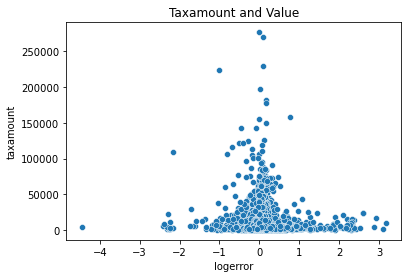

In [21]:
sns.scatterplot(x="logerror",
                y="taxamount", 
                data=train).set(title='Taxamount and Value')

In [22]:
scaled_x_train, Scaler = w.scale_zillow(train_df,features)
scaled_x_validate, Scaler = w.scale_zillow(validate_df, features)
scaled_x_test, Scaler = w.scale_zillow(test_df, features)

/Users/allantestaten/codeup-data-science/clustering-exercises/clustering-project/wrangle_zillow.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impdf[impfeats] = Scaler.fit_transform(impdf[impfeats])


ValueError: too many values to unpack (expected 2)

In [23]:
scaled_x_train

NameError: name 'scaled_x_train' is not defined

In [24]:
location = ['latitude','longitude','age']
location_x_train = scaled_x_train[location]
structure = ['beds','baths']
structure_x_train = scaled_x_train[structure]
Foundation = ['sqft','lotsizesquarefeet']
foundation_x_train = scaled_x_train[Foundation]


NameError: name 'scaled_x_train' is not defined

In [25]:
location_x_train['agebin'] =  pd.cut(location_x_train.age, [0,30,60,90,120])

NameError: name 'location_x_train' is not defined

In [26]:
train_df.head()

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths
13535,0.047065,0.496183,0.419008,0.721678,0.000709,0.181818,0.0
30453,0.137796,0.305344,0.187552,0.940035,0.000970,0.272727,0.2
13337,0.061381,0.419847,0.517215,0.862331,0.001040,0.272727,0.1
7660,0.302719,0.022901,0.478061,0.521215,0.001500,0.454545,0.5
34175,0.279318,0.129771,0.442146,0.853861,0.001455,0.454545,0.4


In [27]:
train['logerror_bin'] = pd.cut(train.logerror, [-5,-1,-.75,-.5,-.25,0,.25,.50,.75, 1, 5])

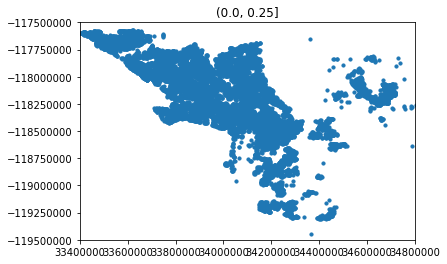

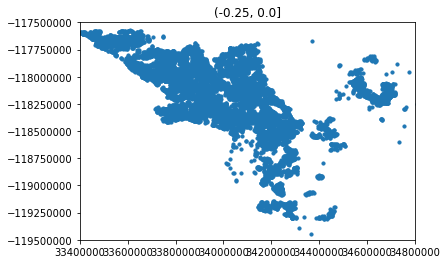

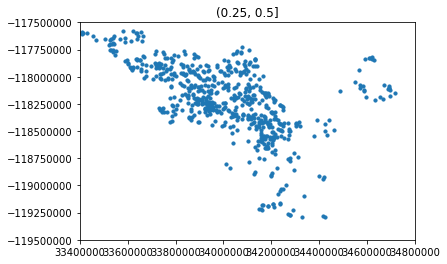

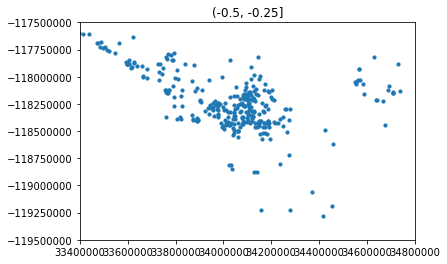

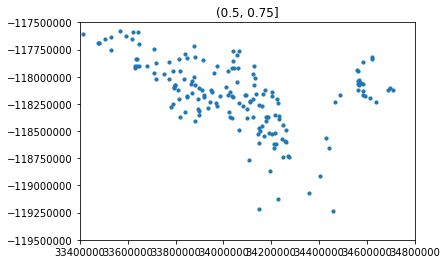

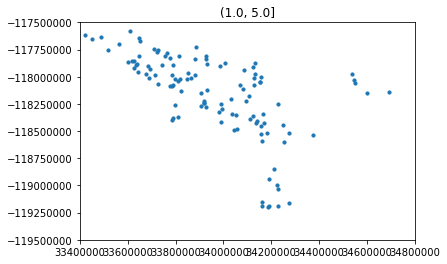

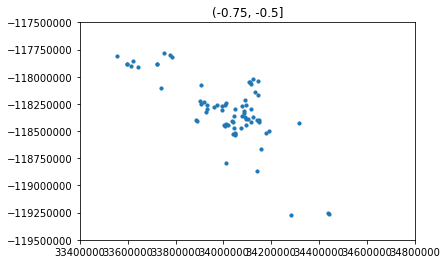

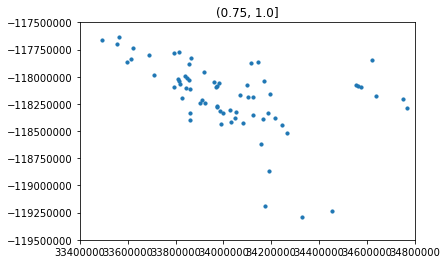

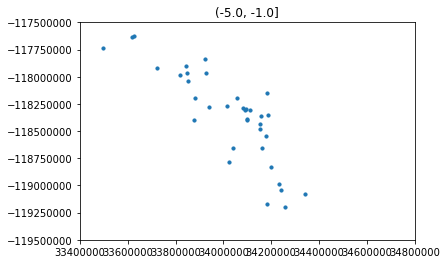

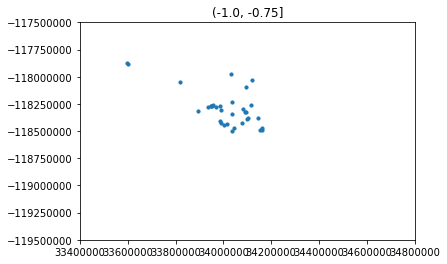

In [28]:
for x in train.logerror_bin.value_counts().index:
    plt.scatter(x='latitude', y='longitude', data=train[train.logerror_bin == x], s = 10)
    plt.title(x)
    plt.xlim(33400000,34800000)
    plt.ylim(-119500000,-117500000)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()


In [29]:
clusters = pd.DataFrame([])
best = pd.DataFrame([])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_train[location])
    location_x_train['bestLocation'] = kmeans.predict(scaled_x_train[location])
    location_x_train['locationcluster',i] = kmeans.predict(scaled_x_train[location])
    clusters['locationclusters',i] = kmeans.predict(scaled_x_train[location])

NameError: name 'scaled_x_train' is not defined

In [30]:
clusters = pd.DataFrame([])
best = pd.DataFrame([])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_train[structure])
    structure_x_train['bestStructure'] = kmeans.predict(scaled_x_train[structure])
    structure_x_train['structurecluster',i] = kmeans.predict(scaled_x_train[structure])
    clusters['structureclusters',i] = kmeans.predict(scaled_x_train[structure])

NameError: name 'scaled_x_train' is not defined

In [31]:
clusters = pd.DataFrame([])
best = pd.DataFrame([])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_train[Foundation])
    foundation_x_train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])
    foundation_x_train['foundationcluster',i] = kmeans.predict(scaled_x_train[Foundation])
    clusters['foundationclusters',i] = kmeans.predict(scaled_x_train[Foundation])

NameError: name 'scaled_x_train' is not defined

In [32]:
kmeans = KMeans(n_clusters=5, random_state = 123)
kmeans.fit(scaled_x_train[structure])
structure_x_train['bestStructure'] = kmeans.predict(scaled_x_train[structure])

NameError: name 'scaled_x_train' is not defined

In [33]:
kmeans = KMeans(n_clusters=5, random_state = 123)
kmeans.fit(scaled_x_train[location])
location_x_train['bestLocation'] = kmeans.predict(scaled_x_train[location])
scaled_x_validate['bestLocation'] = kmeans.predict(scaled_x_validate[location])
scaled_x_test['bestLocation'] = kmeans.predict(scaled_x_test[location])
train['bestLocation'] = kmeans.predict(scaled_x_train[location])


NameError: name 'scaled_x_train' is not defined

In [34]:
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(scaled_x_train[Foundation])
foundation_x_train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])
scaled_x_validate['bestFoundation'] = kmeans.predict(scaled_x_validate[Foundation])
scaled_x_test['bestFoundation'] = kmeans.predict(scaled_x_test[Foundation])
train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])

NameError: name 'scaled_x_train' is not defined

In [35]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(foundation_x_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


NameError: name 'foundation_x_train' is not defined

<Figure size 648x432 with 0 Axes>

In [36]:
location_x_train

NameError: name 'location_x_train' is not defined

In [37]:
for x in location_x_train['bestLocation'].value_counts().index:
    plt.scatter(x=location_x_train.latitude[location_x_train.bestLocation == x], y=location_x_train.longitude[location_x_train.bestLocation == x], c = location_x_train.age[location_x_train.bestLocation == x], s = 10)
    plt.title(x)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()


NameError: name 'location_x_train' is not defined

In [38]:
location_x_train['bestLocation'].value_counts().index

NameError: name 'location_x_train' is not defined

In [39]:
train_df.head()

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths
13535,0.047065,0.496183,0.419008,0.721678,0.000709,0.181818,0.0
30453,0.137796,0.305344,0.187552,0.940035,0.000970,0.272727,0.2
13337,0.061381,0.419847,0.517215,0.862331,0.001040,0.272727,0.1
7660,0.302719,0.022901,0.478061,0.521215,0.001500,0.454545,0.5
34175,0.279318,0.129771,0.442146,0.853861,0.001455,0.454545,0.4


In [40]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [41]:
plt.scatter(x=structure_x_train.beds, y=structure_x_train.baths, c = structure_x_train.bestStructure , s = 50)

plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

NameError: name 'structure_x_train' is not defined

In [42]:
for x in foundation_x_train['bestFoundation'].value_counts().index:
    plt.scatter(x = foundation_x_train.sqft, y = foundation_x_train.lotsizesquarefeet, c = foundation_x_train.bestFoundation, s = 50)

NameError: name 'foundation_x_train' is not defined

In [43]:
for x in foundation_x_train['bestFoundation'].value_counts().index:
    plt.scatter(foundation_x_train.sqft[foundation_x_train.bestFoundation == x], foundation_x_train.lotsizesquarefeet[foundation_x_train.bestFoundation == x], c = train.logerror[foundation_x_train.bestFoundation == x])
    plt.title(x)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()


NameError: name 'foundation_x_train' is not defined

In [44]:

plt.scatter(x = foundation_x_train.sqft, y = foundation_x_train.lotsizesquarefeet, c = foundation_x_train.bestFoundation, s = 50)

NameError: name 'foundation_x_train' is not defined

In [45]:
foundation_x_train.sqft

NameError: name 'foundation_x_train' is not defined

In [46]:
scaled_x_train

NameError: name 'scaled_x_train' is not defined

In [47]:
foundation_x_train


NameError: name 'foundation_x_train' is not defined

In [48]:
train

,propertylandusetypeid,parcelid,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fullbathcnt,...,location,orange_county,ventura,losangeles,logerror_bin,latitude_bin,longitude_bin,squarefeet_bin,age_bin,lowerrors
13535,261.0,12397906,66906,1.0,2.0,1.0,872.0,872.0,Los Angeles CA,1.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]"
30453,261.0,14380619,2800936,3.0,3.0,3.0,2260.0,2260.0,Orange County CA,3.0,...,1,1,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-117800000, 0]","(0, 3000]","(30, 60]","(0.0, 0.25]"
13337,261.0,12902896,1127949,2.0,3.0,2.0,1091.0,1091.0,Los Angeles CA,2.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]"
7660,261.0,11568321,2658421,6.0,5.0,6.0,4783.0,4783.0,Los Angeles CA,6.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]"
34175,261.0,13100555,1758804,5.0,5.0,5.0,4425.0,4425.0,Los Angeles CA,5.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,261.0,14238880,638264,2.0,3.0,2.0,1611.0,1611.0,Orange County CA,2.0,...,1,1,0,0,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(-0.25, 0.0]"
48425,261.0,12438510,2110521,3.0,5.0,3.0,2652.0,2652.0,Los Angeles CA,3.0,...,0,0,0,1,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(-0.25, 0.0]"
19647,261.0,11508139,2077101,2.0,3.0,2.0,1962.0,1962.0,Los Angeles CA,2.0,...,0,0,0,1,"(0.5, 0.75]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]",NaN
21717,261.0,14314819,161303,2.0,3.0,2.0,1714.0,1714.0,Orange County CA,2.0,...,1,1,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(0.0, 0.25]"


In [49]:
locationCluster1Sample = train[train.bestLocation == 4].logerror

AttributeError: 'DataFrame' object has no attribute 'bestLocation'

In [50]:
alpha = .05


Hnull - mean log error of people within locationcluster two is the same as mean log error of total population
Halt - mean log error of people within locationcluster two is different than the mean log error of total population.

loc cluster 1

In [51]:
overall_mean = train.logerror.mean()

In [52]:
t,p = stats.ttest_1samp(locationCluster1Sample,overall_mean)
print(t,p/2,alpha)

AttributeError: 'list' object has no attribute 'ttest_1samp'

In [53]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


NameError: name 'p' is not defined

As you can see location cluster 1 does not have the same mean as the population

In [54]:
foundationCluster1Sample = train[train.bestFoundation == 2].logerror

AttributeError: 'DataFrame' object has no attribute 'bestFoundation'

Hnull - mean log error of people in foundationcluster1 is same as general population
Halt - mean log error of people in foundationcluster1 is different than general population

In [55]:
t,p = stats.ttest_1samp(foundationCluster2Sample,overall_mean)
print(t,p/2,alpha)

AttributeError: 'list' object has no attribute 'ttest_1samp'

In [56]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


NameError: name 'p' is not defined

cluster 2

In [57]:
pd.get_dummies(location_x_train['bestLocation'])

NameError: name 'location_x_train' is not defined

In [58]:
scaled_x_train[['LCluster0','LCluster1','LCluster2','LCluster3','LCluster4']] = pd.get_dummies(location_x_train['bestLocation'])
scaled_x_train[['FCluster0','FCluster1','FCluster2','FCluster3']] =pd.get_dummies(foundation_x_train['bestFoundation'])
scaled_x_validate[['LCluster0','LCluster1','LCluster2','LCluster3','LCluster4']] = pd.get_dummies(scaled_x_validate['bestLocation'])
scaled_x_validate[['FCluster0','FCluster1','FCluster2','FCluster3']] =pd.get_dummies(scaled_x_validate['bestFoundation'])
scaled_x_test[['LCluster0','LCluster1','LCluster2','LCluster3','LCluster4']] = pd.get_dummies(scaled_x_test['bestLocation'])
scaled_x_test[['FCluster0','FCluster1','FCluster2','FCluster3']] =pd.get_dummies(scaled_x_test['bestFoundation'])

NameError: name 'location_x_train' is not defined

In [59]:
scaled_x_train = scaled_x_train.drop(columns = ['LCluster1','LCluster2','LCluster3','FCluster0','FCluster1','FCluster3'])
scaled_x_validate = scaled_x_validate.drop(columns = ['bestLocation','LCluster1','LCluster2','LCluster3','FCluster0','FCluster1','FCluster3'])
scaled_x_test = scaled_x_test.drop(columns = ['bestLocation','bestFoundation','LCluster1','LCluster2','LCluster3','FCluster0','FCluster1','FCluster3'])

NameError: name 'scaled_x_train' is not defined

In [60]:
#unscaled_x_train = scaled_x_train
#unscaled_x_validate = scaled_x_validate


In [61]:
y_train = train.logerror
y_train = pd.DataFrame(y_train)
x_validate = validate[features]
y_validate = validate.logerror
y_validate = pd.DataFrame(y_validate)
x_test = test[features]
y_test = test.logerror

In [63]:

#This is where I create my Lasso Lars model
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model

lars.fit(scaled_x_train, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(scaled_x_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars) ** (1 / 2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(x_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars) ** (1 / 2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train,
      "\nValidation/Out-of-Sample: ", rmse_validate)


NameError: name 'scaled_x_train' is not defined

In [ ]:
scaled_x_validate

In [ ]:
scaled_x_train

In [ ]:
train['LCluster0'] = scaled_x_train.LCluster0
train['LCluster4'] = scaled_x_train.LCluster4
train['FCluster2'] = scaled_x_train.FCluster2

In [ ]:
modeling_feats = ['sqft','age','latitude','longitude','lotsizesquarefeet','beds','baths','LCluster0','LCluster4','FCluster2','taxvaluedollarcnt']
location_feats = ['latitude','longitude','age','LCluster0','LCluster4']
foundation_feats = ['sqft','lotsizesquarefeet','FCluster2']
modeling_train_location = train[location_feats]
modeling_train_foundation = train[foundation_feats]

In [ ]:
scaled_x_train

In [ ]:
scaled_model_train_location = w.scale_zillow(train, location_feats)

In [ ]:
scaled_model_train_location = pd.DataFrame(scaled_model_train_location)

In [ ]:
modeling_train_location

In [71]:
# compute prop_value_pred_median
logerror_pred_median = y_train['logerror'].median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median

# RMSE of prop_value_pred_median
rmse_baseline_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median)**(1/2)
rmse_baseline_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median)**(1/2)

#printing results of baseline model
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_baseline_train, 2),)


RMSE using Median
Train/In-Sample:  0.18


In [ ]:

#This is where I create my Lasso Lars model
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model

lars.fit(modeling_train_location, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(modeling_train_location)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars) ** (1 / 2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(scaled_x_validate[location_feats])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars) ** (1 / 2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train,
      "\nValidation/Out-of-Sample: ", rmse_validate)


In [ ]:
foundation_feats

In [ ]:

#This is where I create my Lasso Lars model
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model

lars.fit(modeling_train_foundation, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(modeling_train_foundation)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars) ** (1 / 2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(scaled_x_validate[foundation_feats])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars) ** (1 / 2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train,
      "\nValidation/Out-of-Sample: ", rmse_validate)


In [ ]:
def polynomialmodel(scaled_x_train[location_feats],scaled_x_validate[location_feats],scaled_x_test[location_feats],y_validate)
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
x_train_degree2Location = pf.fit_transform(scaled_x_train[location_feats])

# transform X_validate_scaled & X_test_scaled
x_validate_degree2Location = pf.transform(scaled_x_validate[location_feats])
x_test_degree2Location = pf.transform(scaled_x_test[location_feats])

# create the model object
lm2Location = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train,
# since we have converted it to a dataframe from a series!
lm2Location.fit(x_train_degree2Location, y_train.logerror)

# predict train
y_train['logerror_pred_lm2Loc'] = lm2Location.predict(x_train_degree2Location)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2Loc) ** (1 / 2)

# predict validate
y_validate['logerror_pred_lm2Loc'] = lm2Location.predict(x_validate_degree2Location)

# evaluate: rmse
rmse_validate = mean_squared_error(validate.logerror, y_validate.logerror_pred_lm2Loc) ** (1 / 2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train,
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
validate

In [ ]:
modeling_train_location

In [ ]:
modeling_train_foundation

In [ ]:
y_train